# Importing Libraries.

In [34]:
#import libraries
import pandas as pd
import numpy as np

#importing liabraries for graphical representation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

#Packages for feature engineering
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier



import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Importing the Data set in a dataframe - travel

In [35]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

sample_submit = pd.read_csv('submit.csv')

In [36]:
train.head(5)

,customer_id,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,...,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,year_of_birth,disbursed_date,Credit_level,employment_type,age,loan_default
0,105691,4,3,0,384989,666207,666207,0,0,0,...,81,0,1.00,2.50,1968,2019,1,0,51,0
1,24938,7,2,0,268670,387994,387994,0,0,0,...,161,0,1.00,1.33,1992,2019,9,0,27,0
2,104389,5,4,1,3519013,3613854,3576048,0,0,0,...,3576048,0,0.99,3.00,1991,2019,13,1,28,0
3,54688,43,13,6,1867106,2484678,2486856,0,0,0,...,0,0,1.00,1.42,1964,2019,3,1,55,0
4,63894,0,0,0,0,0,0,0,0,0,...,0,0,1.00,1.00,1995,2019,-1,0,24,0


##  Basic Data Hygiene Check.

In [37]:
# Checking the distribution of the claims

(train.groupby('loan_default').size()/train.shape[0]).round(4)

loan_default
0    0.823
1    0.177
dtype: float64

Text(0.5, 1.0, 'Count of each Target Class')

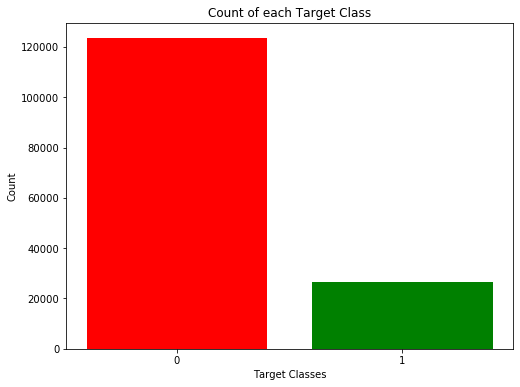

In [38]:
rcParams['figure.figsize'] = 8,6
plt.bar(train['loan_default'].unique(), train['loan_default'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [39]:
#checking for the data types and file size.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    150000 non-null  int64  
 1   main_account_loan_no           150000 non-null  int64  
 2   main_account_active_loan_no    150000 non-null  int64  
 3   main_account_overdue_no        150000 non-null  int64  
 4   main_account_outstanding_loan  150000 non-null  int64  
 5   main_account_sanction_loan     150000 non-null  int64  
 6   main_account_disbursed_loan    150000 non-null  int64  
 7   sub_account_loan_no            150000 non-null  int64  
 8   sub_account_active_loan_no     150000 non-null  int64  
 9   sub_account_overdue_no         150000 non-null  int64  
 10  sub_account_outstanding_loan   150000 non-null  int64  
 11  sub_account_sanction_loan      150000 non-null  int64  
 12  sub_account_disbursed_loan    

In [40]:
# checking for the null values.

train.isnull().sum()

customer_id                      0
main_account_loan_no             0
main_account_active_loan_no      0
main_account_overdue_no          0
main_account_outstanding_loan    0
main_account_sanction_loan       0
main_account_disbursed_loan      0
sub_account_loan_no              0
sub_account_active_loan_no       0
sub_account_overdue_no           0
sub_account_outstanding_loan     0
sub_account_sanction_loan        0
sub_account_disbursed_loan       0
disbursed_amount                 0
asset_cost                       0
branch_id                        0
supplier_id                      0
manufacturer_id                  0
area_id                          0
employee_code_id                 0
mobileno_flag                    0
idcard_flag                      0
Driving_flag                     0
passport_flag                    0
credit_score                     0
main_account_monthly_payment     0
sub_account_monthly_payment      0
last_six_month_new_loan_no       0
last_six_month_defau

# 去除无用字段

In [41]:
# 'branch_id','supplier_id','manufacturer_id','employee_code_id', 'mobileno_flag', 'idcard_flag', 'year_of_birth', 'disbursed_date'
all_columns = [f for f in train.columns if f not in ['customer_id','loan_default', 'branch_id','supplier_id','manufacturer_id','employee_code_id', 'mobileno_flag', 'idcard_flag', 'year_of_birth', 'disbursed_date']]
x_train = train[all_columns]
x_test = test[all_columns]
y_train = train['loan_default']

In [42]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   main_account_loan_no           150000 non-null  int64  
 1   main_account_active_loan_no    150000 non-null  int64  
 2   main_account_overdue_no        150000 non-null  int64  
 3   main_account_outstanding_loan  150000 non-null  int64  
 4   main_account_sanction_loan     150000 non-null  int64  
 5   main_account_disbursed_loan    150000 non-null  int64  
 6   sub_account_loan_no            150000 non-null  int64  
 7   sub_account_active_loan_no     150000 non-null  int64  
 8   sub_account_overdue_no         150000 non-null  int64  
 9   sub_account_outstanding_loan   150000 non-null  int64  
 10  sub_account_sanction_loan      150000 non-null  int64  
 11  sub_account_disbursed_loan     150000 non-null  int64  
 12  disbursed_amount              

#  Inference:
From the above its clear that more then 60% of the data does not have Gender updated. And we also understand that there are no other features that will help us find out whether the individual is male or female.
Thus we will drop this feature

In [43]:
# Check for unique Value in the DataFrame.

x_train.nunique()

main_account_loan_no                104
main_account_active_loan_no          35
main_account_overdue_no              19
main_account_outstanding_loan     48609
main_account_sanction_loan        30564
main_account_disbursed_loan       32862
sub_account_loan_no                  36
sub_account_active_loan_no           21
sub_account_overdue_no                8
sub_account_outstanding_loan       2108
sub_account_sanction_loan          1519
sub_account_disbursed_loan         1725
disbursed_amount                  19235
asset_cost                        38902
area_id                              22
Driving_flag                          2
passport_flag                         2
credit_score                        570
main_account_monthly_payment      21499
sub_account_monthly_payment        1304
last_six_month_new_loan_no           24
last_six_month_defaulted_no          14
average_age                         100
credit_history                      100
enquirie_no                          23


# Analysis:
From the above we can say that Agency Type and Distribution Channel which has just 2 unique values and has dataype object we can use One Hot Encoding and convert them.

We will be left with Destination, Agency and Product Name. We will deep dive into this after some analysis of the rest of the data


In [44]:
# Check for the maximum and minimum values to see if there are any invalid.

x_train.describe()

,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,sub_account_outstanding_loan,...,total_disbursed_loan,total_monthly_payment,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,Credit_level,employment_type,age
count,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,1.500000e+05,...,1.500000e+05,1.500000e+05,150000.00,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.447133,1.045500,0.153427,1.670825e+05,2.225586e+05,2.221730e+05,0.060133,0.027967,0.007293,5.416077e+03,...,2.294413e+05,1.325285e+04,inf,5.169842e+04,2.773138e+03,6.506428e+02,1.438740,3.132360,0.487507,34.132100
std,5.197172,1.952708,0.542496,9.808619e+05,2.840313e+06,2.844075e+06,0.652912,0.325185,0.111236,1.617336e+05,...,2.850957e+06,1.515095e+05,NaN,2.614563e+06,1.043622e+05,1.312314e+05,0.789844,5.268384,0.561527,9.813379
min,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,...,0.000000e+00,0.000000e+00,-110000.33,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-1.000000,0.000000,18.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,-1.000000,0.000000,26.000000
50%,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,-1.000000,0.000000,32.000000
75%,3.000000,1.000000,0.000000,3.545900e+04,6.360000e+04,6.150850e+04,0.000000,0.000000,0.000000,0.000000e+00,...,6.500000e+04,2.076000e+03,1.26,2.500000e+01,0.000000e+00,1.000000e+00,1.670000,8.000000,1.000000,41.000000
max,354.000000,144.000000,23.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,7.000000,3.603285e+07,...,1.000000e+09,2.076655e+07,inf,1.000000e+09,1.980000e+07,5.000000e+07,18.000000,13.000000,2.000000,69.000000


# Preparing and training a baseline model.

In [45]:
# 作为baseline部分仅使用经典的**LightGBM**作为训练模型，我们还能尝试**XGBoost、CatBoost和NN（神经网络）**
def cv_model(clf, train_x, train_y, test_x, clf_name='lgb'):
    folds = 5
    seed = 2021
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

    train = np.zeros(train_x.shape[0])
    test = np.zeros(test_x.shape[0])

    cv_scores = []

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
#         enc = OneHotEncoder(handle_unknown='ignore')
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]
#         enc.fit_transform(trn_x)
#         enc.fit_transform(val_x)

        train_matrix = clf.Dataset(trn_x, label=trn_y)
        valid_matrix = clf.Dataset(val_x, label=val_y)

        params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'metric': 'auc',
            'min_child_weight': 5,
#             'num_leaves': 2 ** 7,
            'num_leaves': 20,
            'max_depth':3,
            'lambda_l2': 10,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.9,
            'bagging_freq': 4,
            'learning_rate': 0.01,
            'seed': 2021,
            'num_threads': 8,
            'n_jobs':-1,
            'silent': False,
            'verbose': -1,
        }
#         print("调参1：提高准确率")
        # {'num_leaves': 20, 'max_depth': 3}
#         min_merror = float('Inf')
#         best_params = {}

#         for num_leaves in range(10,50,2):
#             for max_depth in range(1,8,1):
#                 params['num_leaves'] = num_leaves
#                 params['max_depth'] = max_depth

#                 cv_results = clf.cv(
#                                     params,
#                                     train_matrix,
#                                     seed=2018,
#                                     nfold=3,
#                                     metrics=['binary_error'],
#                                     early_stopping_rounds=100,
#                                     verbose_eval=True
#                                     )

#                 mean_merror = pd.Series(cv_results['binary_error-mean']).min()
#                 boost_rounds = pd.Series(cv_results['binary_error-mean']).argmin()

#                 if mean_merror < min_merror:
#                     min_merror = mean_merror
#                     best_params['num_leaves'] = num_leaves
#                     best_params['max_depth'] = max_depth

#         params['num_leaves'] = best_params['num_leaves']
#         params['max_depth'] = best_params['max_depth']
#         print(best_params)
#         break



        model = clf.train(params, train_matrix, 50000, valid_sets=[train_matrix, valid_matrix], verbose_eval=800,early_stopping_rounds=1000)
        val_pred = model.predict(val_x, num_iteration=model.best_iteration)
        test_pred = model.predict(test_x, num_iteration=model.best_iteration)

        # print(list(sorted(zip(features, model.feature_importance("gain")), key=lambda x: x[1], reverse=True))[:20])

        train[valid_index] = val_pred
        test += test_pred / kf.n_splits
        cv_scores.append(roc_auc_score(val_y, val_pred))
        
        print(cv_scores)
       
    print("%s_scotrainre_list:" % clf_name, cv_scores)
    print("%s_score_mean:" % clf_name, np.mean(cv_scores))
    print("%s_score_std:" % clf_name, np.std(cv_scores))
    return train, test



lgb_train, lgb_test = cv_model(lgb, x_train, y_train, x_test)


# 预测结果
sample_submit['loan_default'] = lgb_test
sample_submit['loan_default'] = sample_submit['loan_default'].apply(lambda x:1 if x>0.25 else 0).values
sample_submit.to_csv('ans_lgb.csv', index=False)

************************************ 1 ************************************
Training until validation scores don't improve for 1000 rounds
[800]	training's auc: 0.653208	valid_1's auc: 0.645507
[1600]	training's auc: 0.662541	valid_1's auc: 0.650525
[2400]	training's auc: 0.668651	valid_1's auc: 0.65224
[3200]	training's auc: 0.673577	valid_1's auc: 0.653253
[4000]	training's auc: 0.678151	valid_1's auc: 0.653418
[4800]	training's auc: 0.682145	valid_1's auc: 0.653543
[5600]	training's auc: 0.685916	valid_1's auc: 0.653626
[6400]	training's auc: 0.689395	valid_1's auc: 0.653452
Early stopping, best iteration is:
[5913]	training's auc: 0.687226	valid_1's auc: 0.653688
[0.6536882449051326]
************************************ 2 ************************************
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
Training until validation scores don't improve for 1000 rounds
[800]	training's a

# Train-Test Split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, random_state = 7)

# Random Forest Classifier.

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

0.9943811205650988
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14972
           1       0.97      1.00      0.99      3715

    accuracy                           0.99     18687
   macro avg       0.99      1.00      0.99     18687
weighted avg       0.99      0.99      0.99     18687



# Logistic Regression

In [56]:
logr = LogisticRegression()
logr.fit(X_train,Y_train)
y_pred = logr.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.8174131749344464
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     14972
           1       0.63      0.19      0.29      3715

    accuracy                           0.82     18687
   macro avg       0.73      0.58      0.59     18687
weighted avg       0.79      0.82      0.78     18687



# Conclusion -

  In the above project we used Machine Learning to predict whether a person would claim his/her travel insurance and built a baseline model using Random Forest Classifier and Logistic Regression. A fair amount of exploratory data analysis has also beend done on the dataset which helped us gain various insights on the given data and helped us in feature engineering . More emphasis on feature selection can be done further down the road but I stopped at the baseline as the results for precision and recall were pretty good. 